In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = "../data/processed/coffee_health_cleaned.csv"
df = pd.read_csv(DATA_PATH)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (10000, 16)


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,0.0000,0.435644,Male,Germany,0.538462,0.527545,0.629630,Good,0.506394,0.602151,Low,0.966667,Mild,Other,0.0,0.0
1,0.0001,0.297030,Male,Germany,0.153846,0.151301,0.437037,Good,0.255754,0.365591,Low,0.733333,Mild,Service,0.0,0.0
2,0.0002,0.475248,Male,Brazil,0.815385,0.809888,0.392593,Fair,0.393862,0.193548,Medium,0.746667,Mild,Office,0.0,0.0
3,0.0003,0.693069,Male,Germany,0.400000,0.400683,0.600000,Good,0.496164,0.451613,Low,0.440000,Mild,Other,0.0,0.0
4,0.0004,0.277228,Female,Spain,0.476923,0.479148,0.303704,Fair,0.465473,0.559140,Medium,0.566667,Mild,Student,0.0,1.0


In [3]:
target = "Health_Issues"
features = df.drop(columns=[target])
labels = df[target]

In [4]:
categorical_cols = features.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = features.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical features:", categorical_cols)
print("Numerical features:", numerical_cols)

Categorical features: ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Occupation']
Numerical features: ['ID', 'Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption']


In [ ]:
numerical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [6]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_pipeline, numerical_cols),
    ("cat", categorical_pipeline, categorical_cols)
])


In [7]:
X = preprocessor.fit_transform(features)

print("Transformed feature shape:", X.shape)

Transformed feature shape: (10000, 45)


In [8]:
encoded_cat_cols = preprocessor.named_transformers_["cat"]["encoder"].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + encoded_cat_cols.tolist()

X_df = pd.DataFrame(X.toarray() if hasattr(X, "toarray") else X, columns=all_feature_names)

print("Engineered features preview:")
print(X_df.head())

Engineered features preview:
         ID       Age  Coffee_Intake  Caffeine_mg  Sleep_Hours       BMI  \
0 -1.731878  0.454572       0.687683     0.655129     0.707255  0.236009   
1 -1.731531 -0.174301      -1.043888    -1.050655    -0.357752 -1.023349   
2 -1.731185  0.634249       1.934414     1.935197    -0.603523 -0.329417   
3 -1.730838  1.622478       0.064317     0.079974     0.543408  0.184606   
4 -1.730492 -0.264140       0.410632     0.435710    -1.095065  0.030399   

   Heart_Rate  Physical_Activity_Hours  Smoking  Alcohol_Consumption  ...  \
0    0.756116                 1.625265      0.0            -0.655745  ...   
1   -0.368433                 0.814134      0.0            -0.655745  ...   
2   -1.186286                 0.860485      0.0            -0.655745  ...   
3    0.040494                -0.205573      0.0            -0.655745  ...   
4    0.551652                 0.234755      0.0             1.524983  ...   

   Sleep_Quality_Good  Sleep_Quality_Poor  Stress_L

In [9]:
X_df[target] = labels.values
X_df.to_csv("../data/processed/engineered_coffee_health.csv", index=False)

print("Feature engineering complete. File saved at '../data/processed/engineered_coffee_health.csv'")

Feature engineering complete. File saved at '../data/processed/engineered_coffee_health.csv'


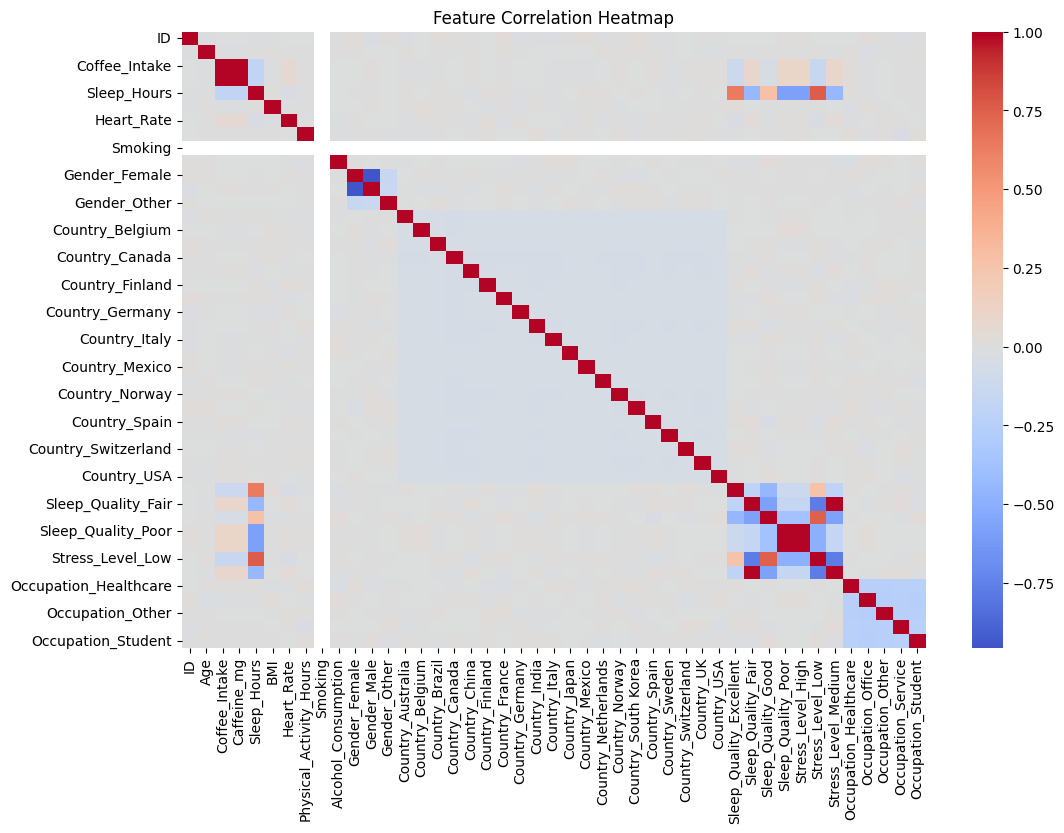

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()